In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


In [11]:
proj = pd.read_csv("C:\\Users\\srich\\Desktop\\project_newday\\year3\\ML\\tempData\\EMOASemanticData.csv")
proj

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,...,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,STUD-P01,Trial001,yes,33,15894369,23,9863210,2,416747,1,...,5,3015788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STUD-P02,Trial001,no,45,16776943,27,9346725,7,3565207,5,...,6,2948673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STUD-P03,Trial001,yes,41,11943779,26,8129800,4,1032671,1,...,7,2632285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUD-P04,Trial001,yes,55,22215175,37,16711365,5,1854232,5,...,6,2815571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUD-P05,Trial001,yes,24,10629981,15,5398827,1,399904,3,...,3,1249473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,STUD-P11,Trial005,no,29,10745558,20,8013096,1,366440,1,...,2,316199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,STUD-P12,Trial005,yes,26,8912917,17,3865009,4,2665604,2,...,2,366415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,STUD-P13,Trial005,no,54,12260893,29,6663119,2,583042,4,...,4,833075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,STUD-P14,Trial005,yes,38,9097022,15,3999012,2,449990,2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
y = proj['Trial']
X = proj[['Total Fixation','Total Duration','Q fix','Q dur','A fix','A dur','B fix','B dur','C fix','C dur','D fix','D dur','K fix','K dur']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [80]:
neigh.score(X_test, y_test)

0.8260869565217391

In [81]:
neigh.predict(X_test)

array(['Trial003', 'Trial005', 'Trial001', 'Trial005', 'Trial005',
       'Trial002', 'Trial004', 'Trial003', 'Trial001', 'Trial004',
       'Trial003', 'Trial003', 'Trial005', 'Trial002', 'Trial002',
       'Trial005', 'Trial002', 'Trial002', 'Trial002', 'Trial001',
       'Trial004', 'Trial004', 'Trial001'], dtype=object)

In [82]:
nn = KNeighborsClassifier(n_neighbors=1) 
nn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [83]:
nn.score(X_test, y_test)

1.0

In [84]:
nn.predict(X_test)

array(['Trial003', 'Trial005', 'Trial001', 'Trial001', 'Trial005',
       'Trial003', 'Trial004', 'Trial002', 'Trial001', 'Trial004',
       'Trial003', 'Trial003', 'Trial005', 'Trial004', 'Trial002',
       'Trial005', 'Trial002', 'Trial002', 'Trial002', 'Trial001',
       'Trial004', 'Trial004', 'Trial001'], dtype=object)

In [85]:
y_pred = neigh.predict(X_test)

In [86]:
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 1],
       [0, 4, 1, 0, 0],
       [0, 1, 3, 0, 0],
       [0, 1, 0, 4, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

In [87]:
y_pred2 = nn.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred2)

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

In [89]:
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("k = ", i, "Accuracy: ", knn.score(X_test, y_test))

k =  1 Accuracy:  0.6521739130434783
k =  2 Accuracy:  0.7391304347826086
k =  3 Accuracy:  0.6521739130434783
k =  4 Accuracy:  0.6521739130434783
k =  5 Accuracy:  0.6521739130434783
k =  6 Accuracy:  0.6956521739130435
k =  7 Accuracy:  0.5652173913043478
k =  8 Accuracy:  0.5652173913043478
k =  9 Accuracy:  0.5217391304347826
k =  10 Accuracy:  0.5217391304347826
k =  11 Accuracy:  0.5652173913043478


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Trial001       1.00      0.80      0.89         5
    Trial002       0.67      0.80      0.73         5
    Trial003       0.75      0.75      0.75         4
    Trial004       1.00      0.80      0.89         5
    Trial005       0.80      1.00      0.89         4

    accuracy                           0.83        23
   macro avg       0.84      0.83      0.83        23
weighted avg       0.85      0.83      0.83        23



In [31]:
df = pd.read_excel("C:\\Users\\srich\\Desktop\\project_newday\\year3\ML\\Lab Session Data.xlsx")
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C_6,22,1,5,167,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C_7,15,4,2,271,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C_8,18,4,2,274,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C_9,21,1,4,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C_10,16,2,4,198,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
A = df[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]]
A

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [33]:
C = df[["Payment (Rs)"]]
C

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [34]:
rp = []
for i in list(df["Payment (Rs)"]):
    if int(i)>200:
        rp.append("RICH")
    else:
        rp.append("POOR")
df.rename(columns={"Unnamed: 5": "RichPoor"}, inplace=True)
df.loc[:, "RichPoor"] = rp

In [40]:
df["RichPoor"].value_counts()
X = df[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]]
y = df["Payment (Rs)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_pseudo_inverse = np.linalg.pinv(X_train)
w = np.dot(X_pseudo_inverse, y_train)

In [45]:
y_pred = np.dot(X_test, w)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 5.6545549686242126e-27
Root Mean Squared Error (RMSE): 7.519677498818824e-14
Mean Absolute Percentage Error (MAPE): 2.517054650018039e-14%
R-squared (R²) score: 1.0


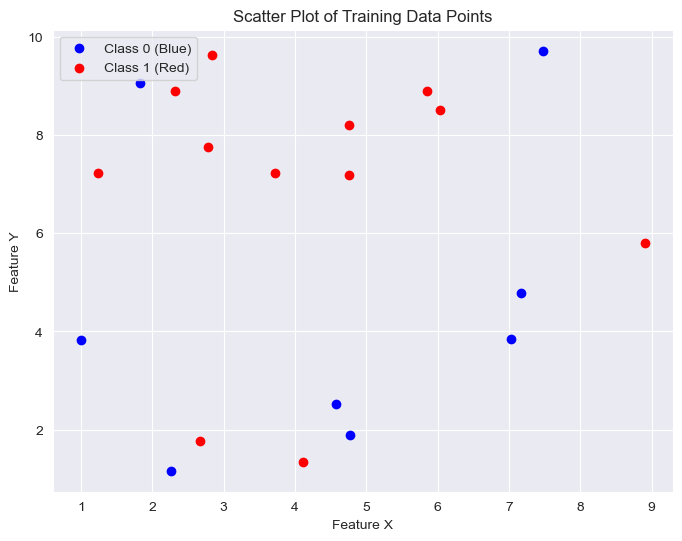

In [64]:
np.random.seed(1)

X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

classes = np.random.choice([0, 1], 20)

plt.figure(figsize=(8, 6))

plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')

plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data Points')
plt.legend()

plt.show()

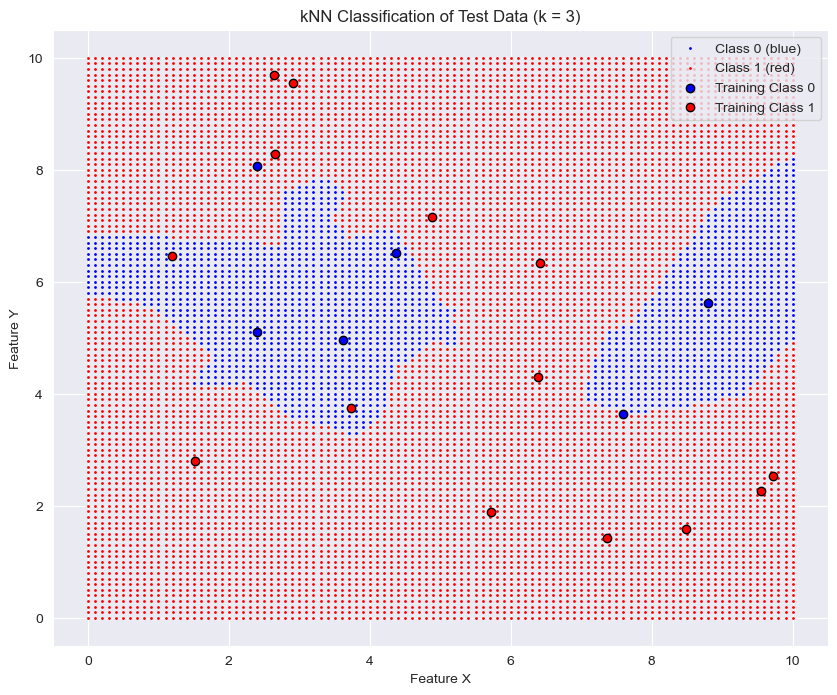

In [68]:
np.random.seed(42)

X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
classes_train = np.random.choice([0, 1], 20)

train_data = np.column_stack((X_train, Y_train))

x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes_train)
predicted_classes = knn.predict(test_data)

plt.figure(figsize=(10, 8))

plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], color='blue', s=1, label='Class 0 (blue)')

plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], color='red', s=1, label='Class 1 (red)')

plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0], color='blue', edgecolor='black', label='Training Class 0', marker='o')
plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1], color='red', edgecolor='black', label='Training Class 1', marker='o')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data (k = 3)')
plt.legend()

plt.show()

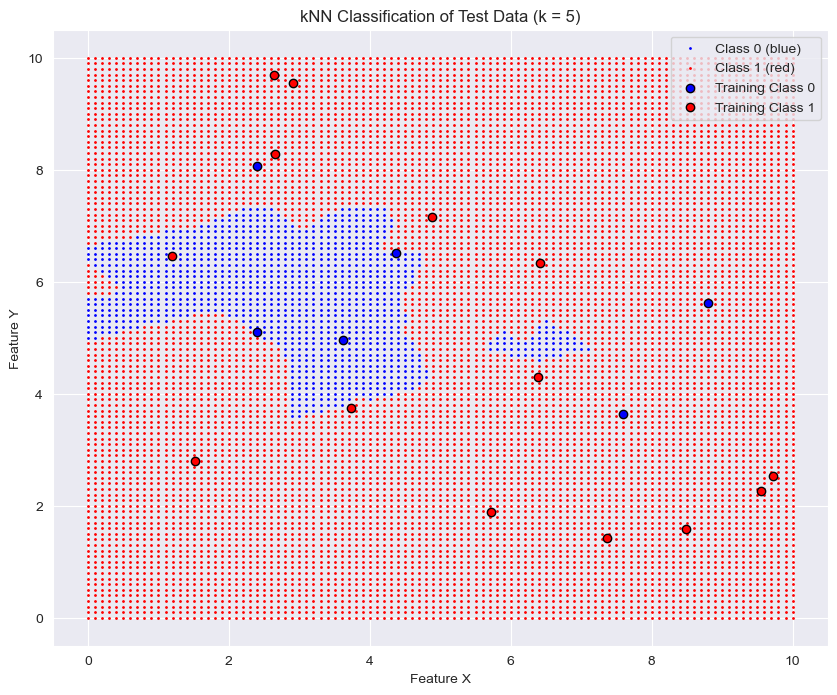

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, classes_train)
predicted_classes = knn.predict(test_data)

plt.figure(figsize=(10, 8))

plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], color='blue', s=1, label='Class 0 (blue)')

plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], color='red', s=1, label='Class 1 (red)')

plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0], color='blue', edgecolor='black', label='Training Class 0', marker='o')
plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1], color='red', edgecolor='black', label='Training Class 1', marker='o')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data (k = 5)')
plt.legend()

plt.show()

In [98]:
y = proj['Trial']
y.value_counts()

Trial
Trial001    15
Trial002    15
Trial003    15
Trial004    15
Trial005    15
Name: count, dtype: int64

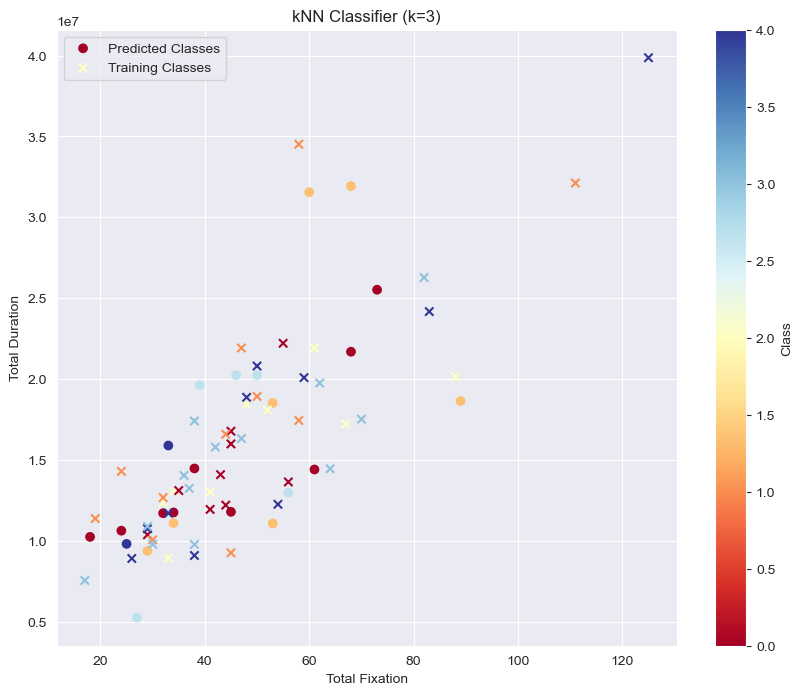

Label mapping: {'Trial001': 0, 'Trial002': 1, 'Trial003': 2, 'Trial004': 3, 'Trial005': 4}


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample data for demonstration (assuming proj is your DataFrame)
# Replace this with your actual DataFrame loading
# proj = pd.read_csv('your_data_file.csv')

# Define features and target variable
y = proj['Trial']
X = proj[['Total Fixation', 'Total Duration']]

# Map categorical labels to numeric values
trial_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_numeric = y.map(trial_mapping)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

# Create and train kNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predict classes on the test set
y_pred = neigh.predict(X_test)

# Scatter plot
plt.figure(figsize=(10, 8))

# Plot test points with their predicted class
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap=plt.cm.RdYlBu, marker='o', label='Predicted Classes')

# Plot training points for reference
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='x', label='Training Classes')

# Add labels, legend, and title
plt.xlabel('Total Fixation')
plt.ylabel('Total Duration')
plt.title('kNN Classifier (k=3)')
plt.legend()
plt.colorbar(label='Class')

# Show plot
plt.show()

# Optionally, print the mapping to see how labels are converted
print("Label mapping:", trial_mapping)


In [114]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Load data
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
knn = KNeighborsClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Instantiate and fit GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output GridSearchCV results
print("GridSearchCV Best Parameters:", grid_search.best_params_)
print("GridSearchCV Best Score:", grid_search.best_score_)

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance']
}

# Instantiate and fit RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Output RandomizedSearchCV results
print("RandomizedSearchCV Best Parameters:", random_search.best_params_)
print("RandomizedSearchCV Best Score:", random_search.best_score_)


GridSearchCV Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
GridSearchCV Best Score: 0.9523809523809523
RandomizedSearchCV Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
RandomizedSearchCV Best Score: 0.9523809523809523
